> {sub-ref}`today` | {sub-ref}`wordcount-minutes` min read

::::{figure} ../figuras/logos/Logo_TalentQ_Azul.png
:width: 150px
:align: right
::::

# Estimación de fase y aplicaciones



$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\i}{{\color{blue} i}} $ 
$ \newcommand{\Hil}{{\cal H}} $
$ \newcommand{\cg}[1]{{\rm C}#1} $
$ \newcommand{\det}{{\rm det}}$


In [1]:
%run ../macro_tQ.py
import sys
sys.path.append('../')
import macro_tQ as tQ


## Estimación Cuántica de Fase

Cuando se construya un computador cuántico capaz de realizar una Transformada de Fourier Cuántica, una de las aplicaciones más frecuentes será la *Estimación Cuántica de Fase*. Veamos cómo funciona.

 Sea $U$ un operador unitario y  $\ket{u}$ un autovector del espacio de Hilbert $\Hil$ de dimensión $n$. 

::::::{card} 
<b>Lema</b>:  

^^^
 por ser unitario, su autovalor es una fase compleja    
 
$$
U \ket{u} = e^{2\pi i\varphi} \ket{u}
$$

::::::

::::::::::{dropdown} Demostración
    
Una forma rápida de demostrar esto es analizar el determinante de la matriz $U$ asociada al operdor. El determinante del producto de dos matrices  tiene una propiedad importantísima, y es que factoriza

$$
\det \, (A B) = (\det A) (\det B)
$$

De esta propiedad se deduce, como ya se vio en el capítulo de operadores, que el determinante de un operador es independiente de la base (lo mismo le pasaba a la traza).  También se deduce que el determinante de un operador unitario es una fase. Por un lado tenemos que 

$$
\det (U U^\dagger) = (\det U)(\det U^{*t}) = (\det U)(\det U)^* = |\det U|^2
$$
Por otro

$$    
\det (U U^\dagger) = \det (U U^{-1}) = \det I = 1
$$
 
Es decir, el módulo de $\det U$ es igual a 1, y por tanto $\det U = e^{i\varphi}$, una fase. En la base en la que $U$ es diagonal, esta fase es el producto de  los elementos de la diagonal. Por tanto, todos los autovaleres deben ser fases
    
$$
e^{i\varphi} = e^{i(\lambda_1 + \lambda_2 +...+\lambda_n)}
$$
s>
::::::::::



$\Rightarrow~$ **Promesa**: *podemos preparar* el autoestado  $\ket{u}$ y aplicar el operador $U$ <u>tantas veces como sea necesario</u> 


$\Rightarrow~$ **Problema**:  calcular  la <u>*mejor aproximación posible*</u> a $\varphi$. 

::::::{admonition} Notar
:class: note

   
Los autovalores  $\lambda = e^{i2\pi \varphi}=e^{i2\pi (\varphi+n)}$  son iguales, para cualquier $n\in {\mathbb Z}$ entero. Por tanto, será suficiente considerar valores de $\varphi$ en el intervalo

$$\varphi \in [0,1)$$
    
para generar <i>todos</i> los  posibles autovalores $\lambda$ distintos
::::::
 
 

El circuito  QPE ("Quantum Phase Estimation") viene representado en la figura,  donde el primer registro tiene dimensión $t$ y la entrada es el estado $\ket{0}_t\otimes \ket{u}$.  

- $t$ es la dimensión del primer registro, o *registro de contaje*.  Su valor controlará **la precisión de nuestra aproximación** a $\varphi$. 


-  $n$ es la dimensión del espacio $\Hil$ al que pertenece  el vector $\ket{u}$, sobre el que actúa $U$.



::::{figure} ./figuras/QPE.png
:width: 500px
:align: center

::::


Si el primer registro tiene $t$ cúbits $\{\ket{y}\}$ con $y \in S_t = 0,1,... 2^t-1$ el estado que genera el circuito justo antes de la transformada de Fourier es el siguiente

\begin{eqnarray*}
\ket{0}_t \otimes \ket{u} ~ &\stackrel{H^{\otimes t}}{\longrightarrow} & ({H^{\otimes t}} \ket{0}_t)\otimes \ket{u}
 =  \frac{1}{2^{t/2}}  \sum_{y_0...y_{t-1}=0,1}\ket{y_{t-1}}...\ket{y_0}\otimes \ket{u}
\\   \rule{0mm}{10mm}
 &\stackrel{\prod_{i=0}^{t-1} \cg{U}^{2^i}}{\longrightarrow} & \frac{1}{2^{t/2}} \sum_{y_0...y_{t-1}=0,1}\ket{y_{t-1}}...\ket{y_0}\otimes U^{y_{t-1}2^{t- 1}}...U^{y_0 2^{0}} \ket{u} \\  \rule{0mm}{10mm}
 && =   \frac{1}{2^{t/2}} \sum_{y\in S_t} \ket{y} \,  U^{y_{t-1}2^{t-1}+ \ldots +y_0 2^0}\ket{u}  \\
 && = \,  \frac{1}{2^{t/2}}  \sum_{y\in S_t} \ket{y} \,  U^y\ket{u} \rule{0mm}{10mm}
\end{eqnarray*}

Ahora viene **la clave**: cuando $\ket{u}$ es un <i>autoestado</i>  de $U$, <u>se produce un <i>retroceso de fase</i> </u>


\begin{eqnarray*}
 \frac{1}{2^{t/2}} \sum_{y\in S_t} \ket{y} U^{y}\ket{u}  &~= ~&  \frac{1}{2^{t/2}} \sum_{y\in S_t} \ket{y} \otimes e^{2\pi i \varphi y}  \ket{u}  =  \frac{1}{2^{t/2}} \sum_{y\in S_t}e^{2\pi i \varphi y}  \ket{y} \otimes   \ket{u}   \\ \rule{0mm}{12mm}
 &~\equiv ~&   \frac{1}{2^{t/2}} \sum_{y\in S_t} e^{2\pi i (2^t \varphi)  y/2^t} \ket{y}\otimes \ket{u}  \label{fase1}  
\end{eqnarray*}

Como de costumbre, el segundo registro ya ha realizado su labor y podemos medirlo o ignorarlo (es una ancilla). De modo que nos vamos a concentrar en el *registro de contaje*, de $t$ cúbits. Para completar el circuito sólo nos faltaría aplicar la transformada de Fourier inversa. Antes de hacerlo vamos a notar que $2^t\varphi$ es, en general, un número real. Vamos a escribirlos separando la *parte entera* $a$, de la *mantisa* $\delta$

$$
2^t \varphi  =a + \delta
$$


::::::{admonition} Ejemplo
:class: tip


Supongamos que la fase que queremos hallar sea: $\varphi = 0.4375 \in [0,1) $.  Entonces

    
- $ 2^2 \varphi = 1.75 \Rightarrow a=1~,~\delta = 0.75$ 
- $ 2^3 \varphi = 3.5~ \Rightarrow a=3~,~\delta = 0.5$ 
- $ 2^4 \varphi = 7  ~~~ \Rightarrow a=7~,~\delta = 0$
    
Cuando $t=4$ obtenemos un número entero.    En realidad  ya lo habíamos cocinado así  $0.4375 = 7 / 2^{4}$.
Pero si $\varphi$ es *irracional* no existirá ningún $t$ para el cuál $2^t\varphi$ no tenga mantisa.   
::::::


Ahora aplicamos la TFC inversa, que es igual a la adjunta,  al primer registro 

\begin{eqnarray*}
U^\dagger_{TFC} \frac{1}{\sqrt{2^t}} \sum_{y=0}^{2^t-1} e^{2\pi i  \, (a + \delta) y/2^t} \ket{y} 
&~~\stackrel{\hbox{linealidad}}{=} ~~&\frac{1}{\sqrt{2^t}} \sum_{y=0}^{2^t-1} e^{2\pi i  \, (a + \delta) y/2^t} U^\dagger_{TFC} \ket{y}
\\ \rule{0mm}{10mm}
~&=&~ \frac{1}{\sqrt{2^t}}   \sum_{y=0}^{2^t-1}  e^{2\pi i (a + \delta) y/2^t}\frac{1}{\sqrt{2^t}}\left( \sum_{x=0}^{2^t-1}e^{-2\pi i  yx/2^t}\ket{x} \right)   \\ \rule{0mm}{10mm}
~&=&~ \frac{1}{2^{t}} \sum_{x=0}^{2^t-1} \sum_{y=0}^{2^t-1}  e^{2\pi i (a + \delta  -x) y/2^t} \ket{x}  \\
\rule{0mm}{8mm}
&~ \equiv ~ & \ket{\Phi}
\end{eqnarray*}

$\ket{\Phi}$ es el *estado final en el registro de contaje*. Vamos a analizar su composición, separando dos casos posibles para $\varphi$.

- Supongamos que  <u>$\underline{\delta = 0}$</u>. Es decir, que $2^t\varphi$ sea un entero $a\in S_t = \{0, \ldots, 2^t-1\}$.

Entonces el resultado
sería  <b>exactamente</b> $\ket{\Phi} = \ket{a} = \ket{2^t\varphi}$ 


\begin{eqnarray*}
\ket{\Phi} &=&  \sum_{x=0}^{2^t-1} \frac{1}{2^{t}}  \left(\sum_{y=0}^{2^t-1}  e^{2\pi i (a-x) y/2^t} \right)\ket{x}  \\  \rule{0mm}{10mm}
&=&  \sum_{x=0}^{2^t-1}  \frac{1}{2^{t}} \left(2^t \delta_{x,a} \right)\ket{x}\\ \rule{0mm}{8mm}
&=& \ket{a}
\end{eqnarray*}

Midiendo el primer registro obtendríamos, **con probabilidad 1**, el registro binario del número $a\in[0, 2^t-1]$ 

Escribiendo $a$ en base decimal, y normalizando por $2^t$, recuperaríamos la *fase* buscada **de forma exacta**

$$
 \varphi = \frac{a}{2^t}  \in [0,1)
$$ 
 


- Supongamos ahora que  $\underline{\delta \neq 0}.~$ Es decir,  $2^t\varphi$ **no** es un entero. 

En este caso la transformada de Fourier inversa no produce un único estado, sino una superposición  


$$
\ket{\Phi} =  \sum_{x=0}^{2^t-1} \left( \frac{1}{2^{t}}\sum_{y=0}^{2^t-1}  e^{2\pi i (a + \delta  -x) y/2^t} \right) \ket{x}  
= \sum_{x=0}^{2^t-1} f(x) \ket{x}
$$


Las amplitudes $f(x)$ están evaluadas con $x\in S_t$ números enteros. Pero la expresión es valida para cualquier número real $x\in {\mathbb R}$.


Una medida dará el registro binario de *un número entero* $x \in [0,2^t-1)$ con distribución de probabilidad $p(x) = |f(x)|^2$ centrada en $a=[2^t\varphi]$. 

Por tanto, con una sucesión de tiradas podríamos reconstruir la distribución de probabilidad, y su media sería el valor buscado de $2^t\delta$.


### Distribución de probabilidad

Para una mantisa fija, $\delta \Rightarrow  2^t\varphi = a+\delta$ las distintas medidas del estado resultante $\ket{x}$ se distribuirán en el torno a $\ket{a}  $.

 Escribiendo $\ket{x}=\ket{a+l}$  podemos obtener la *distribución de probabilidad* $p(x) = p(\delta, l)$ de medir $\ket{x}=\ket{a+l}$



\begin{eqnarray*}
p(\delta, l) = |\braket{a+l}{\Phi}|^2 ~~&=&~~ \left\vert \,  \bra{a+ l} \,  \frac{1}{2^{t}}\sum_{x=0}^{2^t-1}   \sum_{y=0}^{2^t-1}  e^{2\pi i (\delta + a -x) y/2^t} \ket{x}  \,  \right\vert^2  ~~ \stackrel{x= a + l}{=} ~~
  \frac{1}{2^{2t}} \left\vert \,  \sum_{y=0}^{2^t-1} \left(e^{2\pi i (\delta-l) /2^t}\right)^y \,  \right\vert^2 
\\ \rule{0mm}{10mm}
&=& ~~  \frac{1}{2^{2t}} \left\vert\,  \frac{1- e^{2\pi i  \,  (\delta-l) }}{1- e^{2\pi i (\delta-l)/2^t}} \, \right\vert^2   ~= ~ 
\frac{1}{2^{2t}} \left\vert \, \frac{\sin \pi   (\delta-l)}{\sin (\pi(\delta-l)/2^t)} \, \right\vert^2 \,  \\
\end{eqnarray*}

donde en la última línea hemos sumado una [serie geométrica](*https://es.wikipedia.org/wiki/Serie_geom%C3%A9trica).
Vamos a graficar esta función para distintos valores de $\delta$




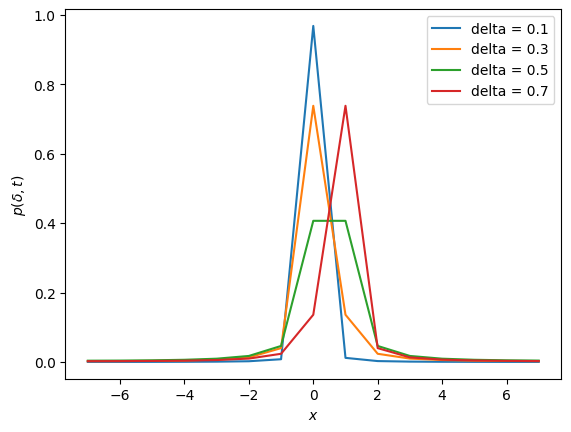

In [2]:
t=4
deltalist = np.array([0.1,0.3,0.5,0.7])
shift=-2**(t-1)+1
xlist = np.arange(shift,2**(t)-1+shift)

for delta in deltalist:
    plist = [(1/2**(2*t))*(np.sin(np.pi*(delta-l))/np.sin(np.pi*(delta-l)/2**t))**2 for l in xlist]
    plt.plot(xlist,plist, label=f'delta = {delta}')

plt.xlabel(r'$x$')
plt.ylabel(r'$p(\delta, t)$')
plt.legend()
plt.show()

El registo de contaje sólo puede dar $2^t$ valores distintos que hemos escogido en el intervalo  $l \in [\hbox{shift},\, 2^{t}-1+\hbox{shift})$. Puedes mover shift.

- Cuando $\delta\ll 1$ la distribución está muy picada en torno a $l=0$, es decir $x=a$. 

- A medida que $\delta$ se acerca a $0.5$  el valor máximo de $p(\delta,l)$ diminuye, pero nunca es menor que $0.405$.
- Cuando $\delta >0.5$ la distribución empieza a mostrar que el valor más aproximado para $2^t\varphi$ es el siguiente, con $l=1$. Es decir $x=a+1$.

::::::::::{dropdown} Demostración
Que la probabilidad nunca es menor de 0.405 en su máximo se puede probar analíticamente

$$
\frac{1}{2^{2t}} \left\vert \, \frac{\sin \pi   (\delta-l)}{\sin (\pi(\delta-l)/2^t)} \, \right\vert^2 \,  
 \geq 
   \frac{1}{2^{2t}} \left(\frac{2 (\delta-l)}{\pi(\delta-l)/2^t }\right)^2 = \left(\frac{2}{\pi}\right)^2 \sim 0.405
$$

donde hemos usado que   $\pi x\geq \sin(\pi x) \geq 2 x$ para $x\in [ 0,\pi/2 ]$.
::::::::::


Si varías $t$ comprobaras que:  **la anchura $t$ del circuito de contaje** determina la dispersion de la curva de probabilidad en torno al valor medio.

Es decir, si queremos acotar por debajo la probabilida de aproximar el valor correcto de $\varphi$, la variable relevante que debemos controlar es la anchura $t$ (ver Nielsen p. 224)

::::::{card} 
<b>Teorema</b>:  

^^^
    
El algoritmo QPE (Quantum Phase Estimation) es capaz de producir 

- una <i>estimación $m$ de orden $k$</i>  para la fase $\varphi$ (en el sentido de que  $|\varphi- m/2^t |<2^{-k}$) 
- con una  probabilidad $1-\epsilon$

tomando una anchura del registro de contaje, $t$,  suficientemente alta


$$
t \geq k  + \left[ \log\left(1 + \frac{1}{2\epsilon}\right) \right] \label{tedeene}
$$
::::::


### Ejemplo

Vamos a estudiar esta distribución analizando el operador unitario de fase



$$
U =  \begin{bmatrix} e^{2\pi i \phi_0} & 0 \\ 0 & e^{2\pi i\phi_1}\end{bmatrix} 
$$


que tiene por autoestados  $\ket{0}$ y $\ket{1}$ con autovalores $e^{2\pi\phi_0}$ y $e^{2\pi \phi_1}$ respectivamente. 

Para programar el oráculo que implementa este operador notamos que 



$$
U =  
\begin{bmatrix} e^{2\pi \phi_0} & 0 \\ 0 & e^{-2\pi i\phi_0}\end{bmatrix}
\begin{bmatrix} 1 & 0 \\ 0 & e^{2\pi i(\phi_0+\phi_1)}\end{bmatrix} = 
R_z(\theta = -4\pi \phi_0) \cdot P(\theta = 2\pi (\phi_1+\phi_0))
$$


El circuito requiere la versión *controlada* $\cg U^k$ de potencias de este operador

In [3]:
def c_Uop(phi0,phi1,power):
    U = QuantumCircuit(1)        
    for _ in range(power):
        U.rz(-phi0*4*np.pi,0)
        U.p((phi1+phi0)*2*np.pi,0)
    U = U.to_gate()
    U.name = "c_U(%f ,%f)^%i" % (np.round(phi0,5), np.round(phi1,5),power)
    U = U.control()
    return U

Para poner a prueba el algoritmo vamos a  por seleccionar unos valores de $\phi_i = (\phi_0,\phi_1)$ de la forma  

$$\phi_i = (a_i + \delta_i) 2^{-t}$$

In [4]:
t_seed=3

a0 = 2.
delta0 = 0.2
phi0 = (a0+delta0)*2.**(-t_seed) 

a1 = 3.
delta1 = 0.
phi1 =(a1+ delta1)*2.**(-t_seed) 

print('phi0=', phi0, ' ->   2^t*phi0 = a0 + delta0 = ', 2**t_seed*phi0 , ' , a0 =' ,int(2**t_seed*phi0), '=>', format(int(2**t_seed*phi0),'b').zfill(t_seed) )
print('phi1=', phi1, ' ->   2^t*phi1 = a1 + delta1 = ', 2**t_seed*phi1 , ' , a1 =' ,int(2**t_seed*phi1), '=>', format(int(2**t_seed*phi1),'b').zfill(t_seed) )


phi0= 0.275  ->   2^t*phi0 = a0 + delta0 =  2.2  , a0 = 2 => 010
phi1= 0.375  ->   2^t*phi1 = a1 + delta1 =  3.0  , a1 = 3 => 011


Construimos el circuito QPE

/opt/anaconda3/envs/TalentQ/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


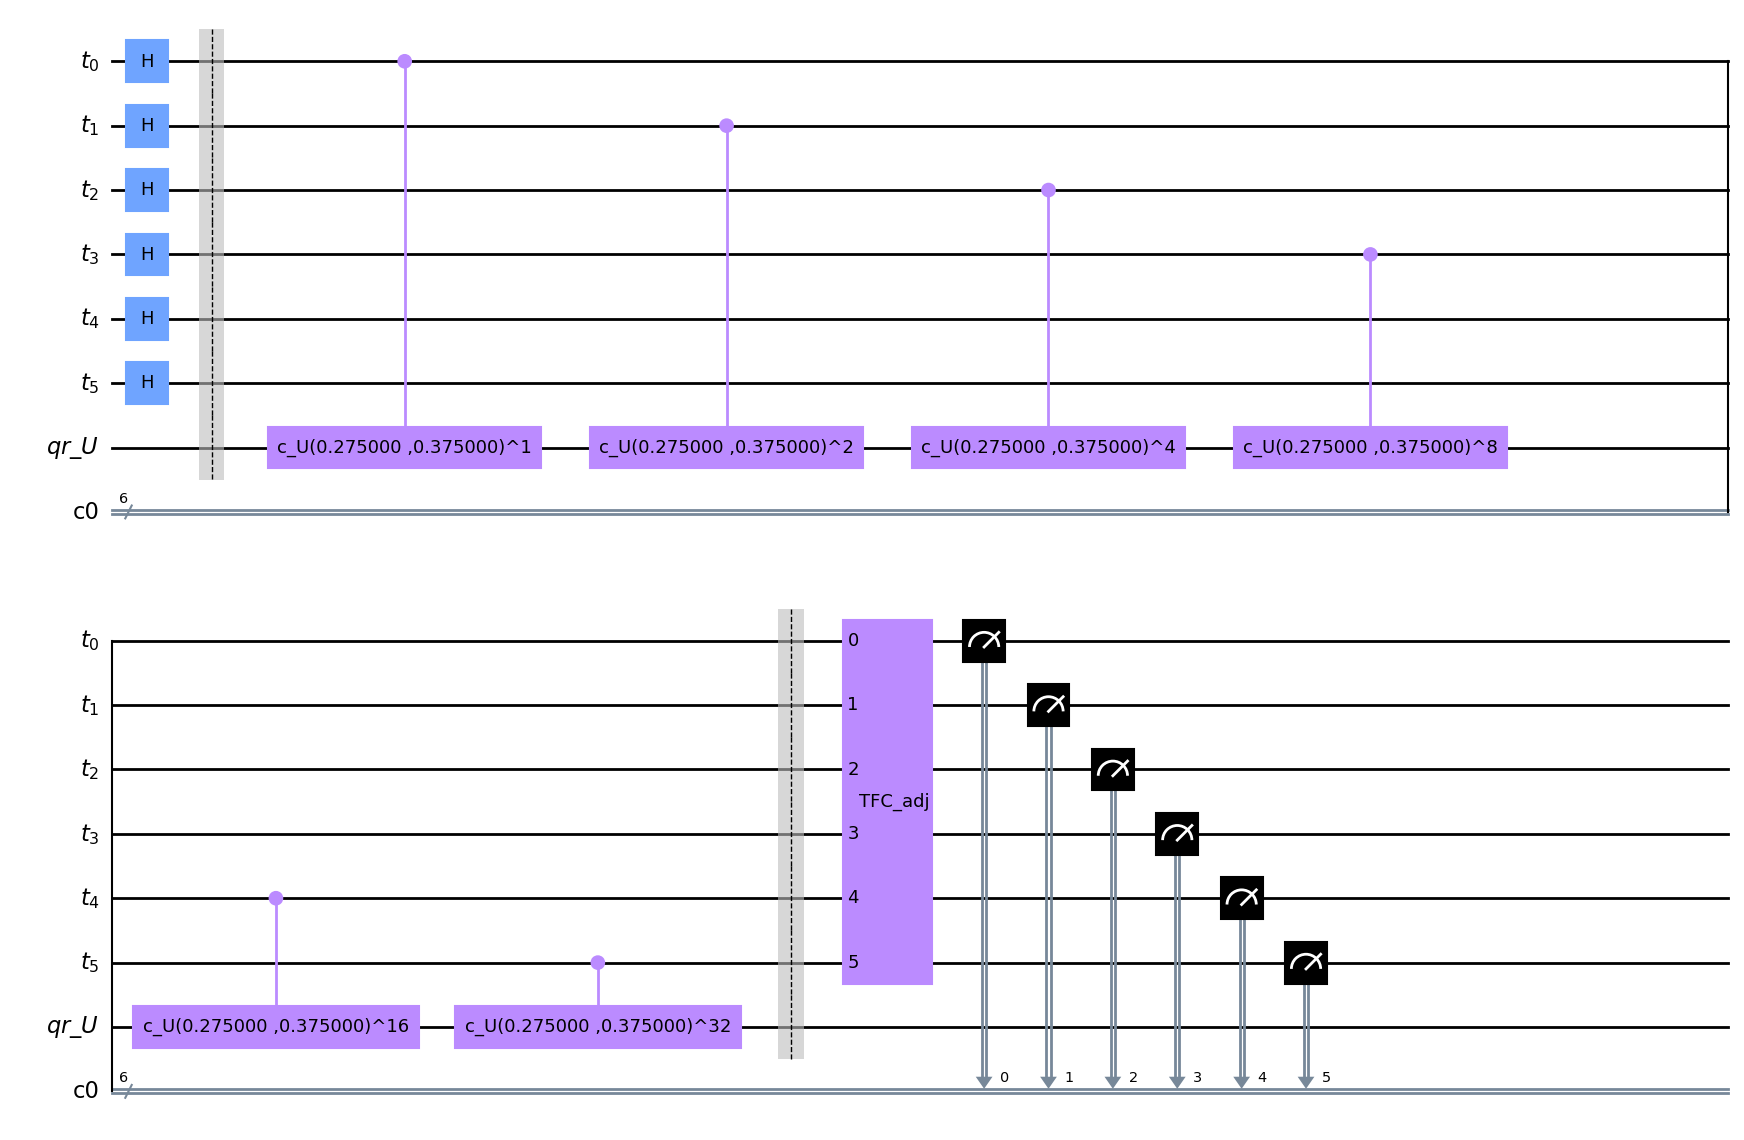

In [5]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

t = 6 # la dimensión del registro de evaluación 
n = 1 # la dimensión del espacio de representación del opeador U

qrt=QuantumRegister(t,name="t")
qra=QuantumRegister(n,name="qr_U") # aquí 1 es la dimensión del espacio en el que opera U
crt=ClassicalRegister(t)

qpe = QuantumCircuit(qrt,qra,crt)   

##########################################################################
#inicializamos la ancilla en un autoestado |u> =|0> o |u> = |1>
#qpe.x(qra)   
##########################################################################


qpe.h(range(t))
qpe.barrier()

# aplicamos los operadores controlados c-U^j 
for j in range(t):
    qpe.append(c_Uop(phi0,phi1,2**j),[qrt[j]]+qra[:])
    

qpe.barrier()

# aplicamos la QFT^-1 que está definida en macro.py 
qpe.append(TFC_adj(t),qrt)

qpe.measure(qrt,crt)

qpe.draw(output="mpl")

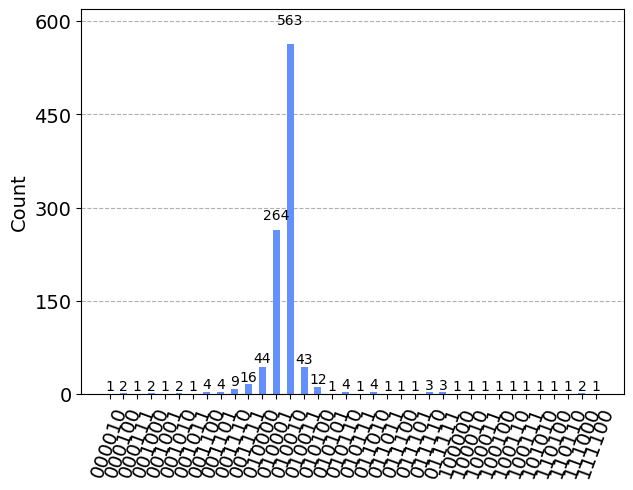

In [6]:
'ejecutamos el circuito'
from qiskit.primitives import Sampler
from qiskit.visualization import plot_histogram, plot_bloch_multivector

nshots = 1000
dist = Sampler().run(qpe,shots=nshots).result().quasi_dists[0]
counts = tQ.dist2counts(dist,t,nshots)

plot_histogram(counts)

De aquí extraemos la aproximación que hemos obtenido. 

In [7]:
max(counts, key=counts.get)

'010010'

In [8]:
a_resultante = int(max(counts, key=counts.get),2)

# Seleccionamos el autovalor asociado a |u> 
phi = phi0  # si |0>
#phi = phi1   # si |1>

print('el valor de phi original era =', phi)

print('la mejor aproximación al valor verdadero es a/2^t =', a_resultante*2**(-t))

print('el error relativo es delta/(2^t phi) =', (phi -a_resultante*2**(-t))/phi)

el valor de phi original era = 0.275
la mejor aproximación al valor verdadero es a/2^t = 0.28125
el error relativo es delta/(2^t phi) = -0.022727272727272645


::::::{admonition} Ejercicio
:class: tip

vuelve a ejecutar el circuito cambiando el valor de $\varphi_0$. 
::::::


### ¿y si no podemos preparar  un autoestado?

Una de las premisas usadas en la sección anterior es la posibilidad de preparar el autoestado $\ket{\psi}$ de $U$ 

En caso contrario, ¿qué *resultado* obtenemos después de usar el circuito de estimación cuántica de fase?


Apliquemos el circuito anterior a un vector arbitrario $\ket{b}$. Genéricamente dicho vector admitirá una expansión de la forma

$$
\ket{b} = \sum_{i=1}^N c_i \ket{u_i}
$$
en la *base de autovectores* de $U$

$$U\ket{u_i} = e^{2\pi i\varphi_i}\ket{u_i}$$  






Debido a la linealidad del circuito QPE, a la salida del mismo encontraremos una combinación lineal de estados 
de la forma

\begin{eqnarray*}
U_{QPE}\, :\,\ket{0}_t \left(\sum_{i=1}c_i\ket{u_i}\right) &=& \sum_{i=1}c_i U_{QPE}\left(\ket{0}_t\ket{u_i}
\rule{0mm}{6mm}\right)  \\
&=& \sum_{i=1}^N  c_i \ket{\Phi_i}\ket{u_i} 
\\
&=& \sum_{i\in S_n}\sum_{x\in S_t} c_i \ket{x}\braket{x}{\Phi_i}\ket{u_i}
\\
&=& \sum_{i\in S_n}\sum_{x\in S_t} c_i \braket{x}{\Phi_i} \ket{x}\ket{u_i} 
\end{eqnarray*}



Midiendo en el primer registro $\ket{x}\hookrightarrow \ket{m}$ obtendremos un número entero $\to m $ con probabilidad

$$
p(m) = \sum_i  |c_i|^2  |\braket{m}{\Phi_i}|^2   = \sum_i  |c_i|^2  p(\delta_i,l_i)
$$




La probabilidad $p(m)$ es una **suma ponderada de distribuciones** $p(\delta_i,l_i) =  |\braket{m}{\Phi_i}|^2$
con  $m = a_i + l_i$ *picadas* en torno  $l_i = 0$.


Si $t$ se escoge como en el teorema descrito anteriormente, el resultado será una aproximación $a_i$ a $2^t\varphi_i$ con una probabilidad de acierto de, al menos, $|c_i|^2 (1-\epsilon)$.



*Ejemplo:*

Vamos a correr el circuito QPE inicializando para una  combinaciones $\ket{b} = \cos \theta/2 \ket{0} + \sin \theta/2
 \ket{1}= R_y(\theta)\ket{0}$ de autoestados de $P(\varphi)$.



In [9]:
t_seed = 3

a0 = 1.
delta0 = 0.1
phi0 = (a0+ delta0)*2.**(-t_seed) 

a1 = 3.
delta1 = 0.1
phi1 =(a1+ delta1)*2.**(-t_seed) 

print('phi0=', phi0, ' ->   2^t*phi0 = a0 + delta0 = ', 2**t_seed*phi0 , ' , a0 =' ,int(2**t_seed*phi0), '=>', format(int(2**t_seed*phi0),'b').zfill(t_seed) )
print('phi1=', phi1, ' ->   2^t*phi1 = a1 + delta1 = ', 2**t_seed*phi1 , ' , a1 =' ,int(2**t_seed*phi0), '=>', format(int(2**t_seed*phi1),'b').zfill(t_seed) )


phi0= 0.1375  ->   2^t*phi0 = a0 + delta0 =  1.1  , a0 = 1 => 001
phi1= 0.3875  ->   2^t*phi1 = a1 + delta1 =  3.1  , a1 = 1 => 011


/opt/anaconda3/envs/TalentQ/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


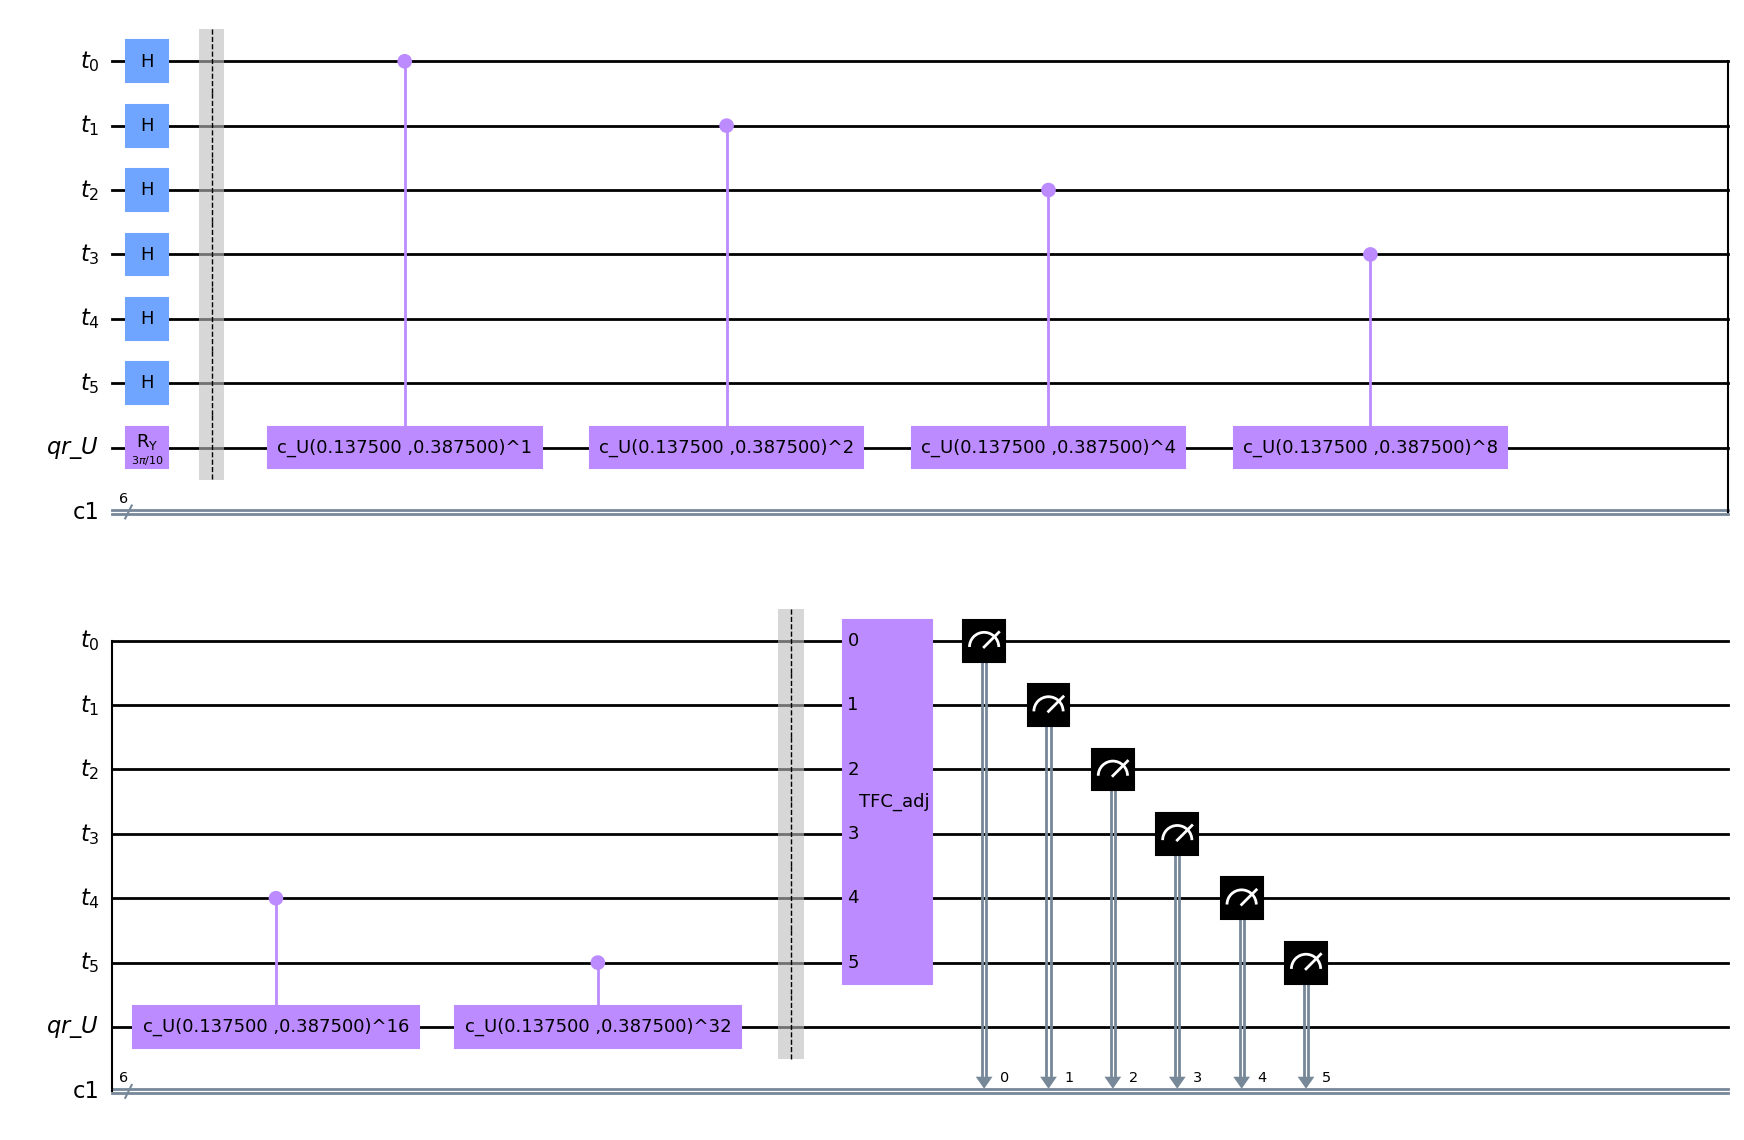

In [10]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

t = 6 # la dimensión del registro de evaluación 
n = 1 # la dimensiónd el espacio de representación del opeador U

qrt=QuantumRegister(t,name="t")
qra=QuantumRegister(n,name="qr_U") # aquí 1 es la dimensión del espacio en el que opera U
crt=ClassicalRegister(t)

qpe = QuantumCircuit(qrt,qra,crt)   

##########################################################################
#inicializamos la ancilla en una combinación cos(th/2)|0> + sin(th/2)|1>
theta = 2*np.pi*0.15 
qpe.ry(theta,qra) 
##########################################################################

qpe.h(range(t))
qpe.barrier()

# aplicamos los operadores controlados c-U^j 
for j in range(t):
    qpe.append(c_Uop(phi0,phi1,2**j),[qrt[j]]+qra[:])
#    qpe.cp(2*np.pi*phi1*(2**j), qrt[j], qra); # This is C-U
    

qpe.barrier()

# aplicamos la QFT^-1 que está definida en macro.py 
qpe.append(TFC_adj(t),qrt)

# podemos hacerlo usando la librería de qiskit 
#from qiskit.circuit.library import QFT
#qpe.append(QFT(len(qr),do_swaps=True).inverse(),qr)


qpe.measure(qrt,crt)

qpe.draw(output="mpl")

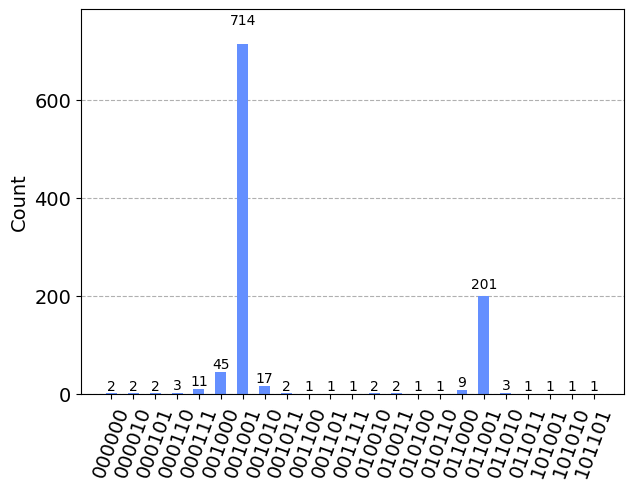

In [11]:
from qiskit import Aer, execute
M_backend = Aer.get_backend('qasm_simulator')

from qiskit.visualization import plot_histogram
results = execute(qpe, M_backend, shots=1024).result()
counts = results.get_counts()
plot_histogram(counts)

## Orden  modular

::::::{card} 
<b>Definición</b>: </i>Orden modular</i> 

^^^


Sean $m,N \in {\mathbb N}$ dos enteros $m<N$ coprimos (sin divisores  comunes).
Definimos el <b> orden de $m$ módulo $N$</b> como el  menor entero positivo, $r$, tal que $m^r = 1$ mod$N$.
::::::



**Problema**: dados $m$ y $N$,   hallar $r$ con el número mínimo de operaciones.

*Ejemplo:*

In [12]:
{2,4,7,8,11,13}   # comprimos con 15
m=7
N=15
[m**i%N for i in range(17)]

[1, 7, 4, 13, 1, 7, 4, 13, 1, 7, 4, 13, 1, 7, 4, 13, 1]

::::::{admonition} Nota
:class: note


En general, si $N=2^n$, clásicamente no existen algoritmos capaces de resolver este problema en un número  de pasos que sea <i> polinómico en $n$</i>. 

Por el contrario, verificar si un $r$ es solución es fácil.

 
    
Nos hallamos ante un problema de tipo NP.
::::::


::::::{admonition} Nota
:class: note

    
Como  $m^r = 1 = m^0$, a partir de ese momento la serie de valores $\{m^0,m^1,\ldots m^{r-1}\}$ se repite. 
Por tanto, halla el <i> orden modular </i> de $m$ módulo $N$  es lo mismo que hallar la <i> periodicidad</i> de la función $f(x) = m^x\, $mod$N$. 
     
    
Sin embargo, si tratamos de fabricar un oráculo para el operador unitario $U_f:\ket{x}\ket{y} \to \ket{x}\ket{m^x y \,{\rm mod} N}$ nos encontraremos con una complejidad exponencial
::::::


Sea $U ; \Hil_n \to \Hil_n $ un oráculo que actúa en la forma siguiente sobre la base $\{\ket{y}\}$  donde $y \in S_n = {0,1,...,N-1}$.

$$
U\ket{y }  = \ket{m y \,{\rm mod} N}
$$


::::::{admonition} Nota
:class: note


Un oráculo general que funcione para cualquier $(m,N)$ no es conocido.
::::::


La composición  $U^x = \underbrace{U\cdot U \cdots U}_{x}$ genera todos los vectores que buscamos

$$
U^x\ket{y }  = U^{x-1}\ket{m y \,{\rm mod} N} =  U^{x-2}\ket{m^2 y \,{\rm mod} N} = ... = \ket{m^x y \,{\rm mod} N}
$$


El *orden* de $m$ mod$N$ es claramente el número $r$ tal que 

$$U^{r }\ket{y} = \ket{m^r  y \,{\rm mod} N} = \ket{y}$$



Con $U$ podríamos implementar la función $f(x) = m^x{\rm mod} N$ en la forma

$$
U_f \ket{x}\ket{1}  = \ket{x}U^x\ket{1} = \ket{x}\ket{m^x \, {\rm mod} N }
$$

y buscar la periodicidad de $f(x+r) = f(x)$ siguiento el método de la lección anterior.

::::::{admonition} Notar
:class: note


    

- La acción de $U_f$ parece mucho a la de un operador controlado $\cg{U}\ket{x}\ket{y} = \ket{x}U^x\ket{y}$. Sin embargo ahora $x = 0,1,...,2^t-1$ es un entero. El circuito que implementa $U_f$ es precisamente el que se utiliza en el circuito de QPE. 


- Con esta observación vemos que el circuito de QPE se parece mucho al que hemos usado en la búsqueda de un período en el tema anterior.
    

    
::::::


Vamos a aplicar el  método de <i> Estimación Cuántica de Fase</i> (QPE) al operador $U$ 

Recordemos que dicho método <u>nos pide evaluar el operador $U$ sobre sus autovectores</u> $U\ket{u} = e^{i\varphi}\ket{u}$.

Si *conociésemos* $r$ podríamos construir el siguiente conjunto de $r$  vectores $\ket{u_s}$ con $s=0,...,r-1$ 


$$
\ket{u_s} = \frac{1}{\sqrt{r}} \sum_{j=0}^{r-1} e^{-2\pi i \frac{s }{r}j} U^j\ket{1}
$$



::::::{card} 
<b>Teorema</b>:  

^^^


 Los vectores   $\{\ket{u_s}\}$   forman un conjunto de <i>autovectores</i> de  $U$ con <i>autovalores</i> $e^{2\pi i s/r}~$. Es decir
    

$$
U\ket{ u_s} = e^{i\varphi_s} \ket{u_s}
$$

con 
$$
\varphi_s = s/r~~~~~~ s=0,...,r-1
$$

::::::


**Prueba**:
\begin{eqnarray}
U \ket{u_s} &=& \frac{1}{\sqrt{r}} \sum_{j=0}^{r-1} e^{-2\pi i s j/r} U^{j+1}\ket{1} 
\nonumber\\
 &=& e^{2\pi i \frac{s}{r}}  \frac{1}{\sqrt{r}} \sum_{j=0}^{r-1} e^{-2\pi i  s (j+1)/r} U^{j+1}\ket{1} =
 e^{2\pi i \frac{s}{r}}  \frac{1}{\sqrt{r}} \sum_{j=0}^{r-1} e^{-2\pi i  s j/r} U^{j}\ket{1} 
\nonumber\\
&=& e^{2\pi i s/r} \ket{u_s}\, .  \rule{0mm}{8mm}
\end{eqnarray}


Podríamos sencillamente aplicar el algoritmo de estimación de fase para *extraer la serie* de valores de $\varphi_s = s/r$ y de ahí recuperar el *orden modular* $r$.

El problema es que, para generar $\{\ket{u_s}\}$ necesitamos conocer $r$, que, *precisamente, es el dato  que buscamos* 

Una *observación importante* nos permite soslayar esta dificultad: vamos a tomar una *combinación homogénea* de los autoestados $\ket{u_s}$



\begin{eqnarray}
\frac{1}{\sqrt{r}} \sum_{s=0}^{r-1}\ket{u_s}   &=& \frac{1}{\sqrt{r}} \sum_{s=0}^{r-1} \left(  \frac{1}{\sqrt{r}}   \sum_{j=0}^{r-1} e^{-2\pi i  sj/r} U^{j}\ket{1} \right) ~=~ \frac{1}{r}   \sum_{j=0}^{r-1} \left(  \sum_{s=0}^{r-1}e^{-2\pi i  sj/r} \right)U^{j}\ket{1} \nonumber\\ 
\rule{0mm}{12mm}
&=&   \frac{1}{r}   \sum_{j=0}^{r-1} \, (r \delta_{j,0}) \,  U^{j}\ket{1} = U^0\ket{1} \nonumber\\  \rule{0mm}{10mm}
&=& \ket{1}
\end{eqnarray}



<u>¡El resultado es asombrosamente simple!</u>:

si inicializamos el circuito de estimación de fase con el estado $\ket{0}_t\ket{1}_n$ a la salida obtendremos una superposición uniforme

$$
U_{QPE} : \ket{0}_t \otimes \ket{1}_n  ~ \to ~ \frac{1}{\sqrt{r}}\sum_{s=0}^{r-1} \ket{m_s}\otimes\ket{u_s}
$$

donde $m_s = 2^t s/r$ siempre que $t$ se haya elegido de forma que $~2^t s/r \in {\mathbb Z}$ sea entero.


<center> 
<img src="./figuras/Orden_modular.png" width='60%' style='margin:left'/>
</center>


### Ejemplo:

Necesitamos un oráculo que implemente la operación 

$$U^{x }\ket{y} = \ket{m^x  y \,{\rm mod} N} $$

El siguiente código implementa este oráculo para $N=15$ y $m\in \{2,4,7,8,11,13\}$ coprimos, y lo convierte en una puerta controlada

In [13]:
def c_amod15(m, power):
    """Controlled multiplication by a mod 15"""
    if m not in [2,4,7,8,11,13]:
        raise ValueError("'a' must be 2,4,7,8,11 or 13")
    U = QuantumCircuit(4)        
    for iteration in range(power):
        if m in [2,13]:
            U.swap(2,3)
            U.swap(1,2)
            U.swap(0,1)
        if m in [7,8]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
        if m in [4, 11]:
            U.swap(1,3)
            U.swap(0,2)
        if m in [7,11,13]:
            for q in range(4):
                U.x(q)
#    print(U)
    U = U.to_gate()
    U.name = "%i^%i mod 15" % (m, power)
    c_U = U.control()
    return c_U

Función definida en [Qiskit Textbook](https://qiskit.org/textbook/ch-algorithms/shor.html)

/opt/anaconda3/envs/TalentQ/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


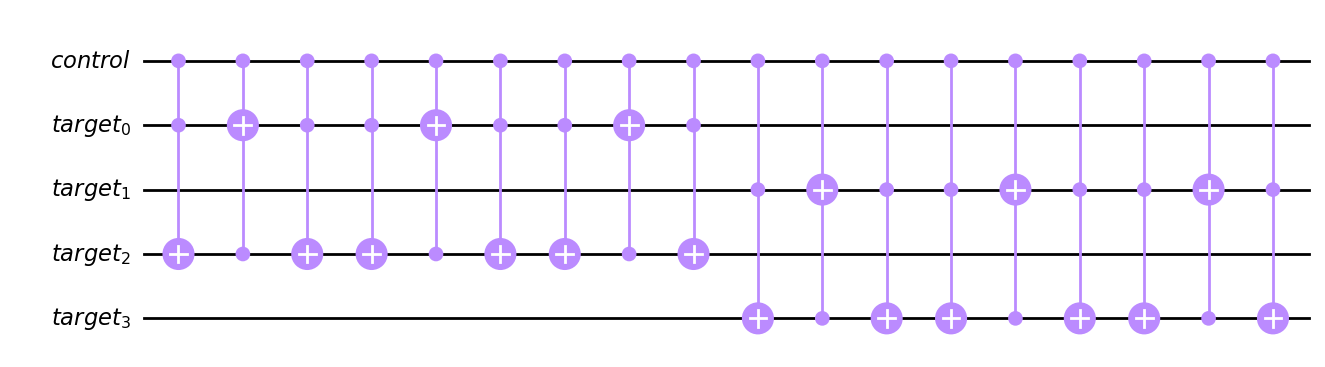

In [14]:
c_amod15(4,3 ).definition.draw('mpl')

::::::{admonition} Ejercicio
:class: tip


Construye un circuito con esta puerta y verifica que reproduce la lista $m^x$ mod 15 con $x=0,1,2,...$
::::::


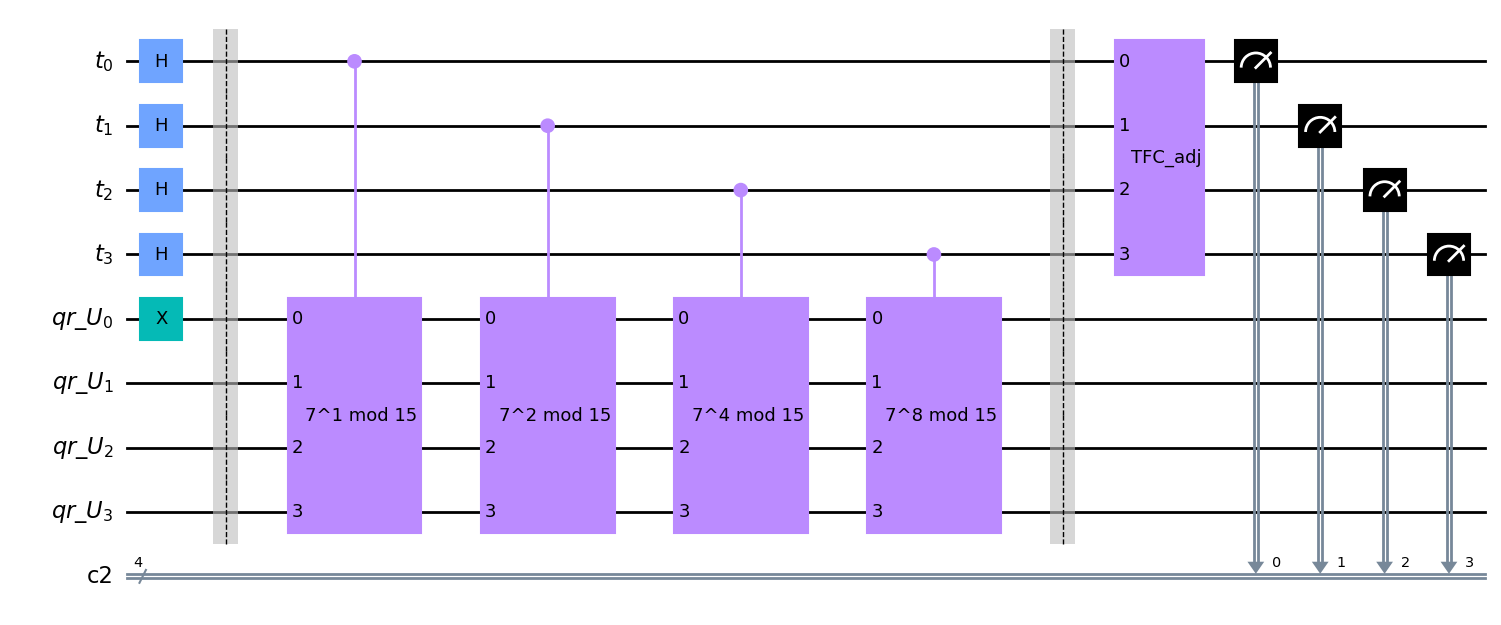

In [15]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

t = 4 
n = 4 
m = 7

qr=QuantumRegister(t,name="t")
ar=QuantumRegister(4,name="qr_U") # aquí 1 es la dimensión del espacio en el que opera U
cr=ClassicalRegister(t)

qc = QuantumCircuit(qr,ar,cr)   

qc.x(ar[0]) #  inicializamos la ancilla al autoestado de P(phi) ->  |u> = |1>
#qpe.h(ar[0]) #  

qc.h(range(n))
qc.barrier()

# aplicamos los operadores controlados c-U^j 
for q in range(t):
    qc.append(c_amod15(m, 2**q), [qr[q]] + ar[:])


qc.barrier()

# aplicamos la QFT^-1 que está definida en macro.py 
qc.append(TFC_adj(t),qr)

# podemos hacerlo usando la librería de qiskit 
#from qiskit.circuit.library import QFT
#qpe.append(QFT(len(qr),do_swaps=True).inverse(),qr)


qc.measure(qr,cr)

qc.draw(output="mpl")

Ejecutamos el circuito y listamos los suceso más probables

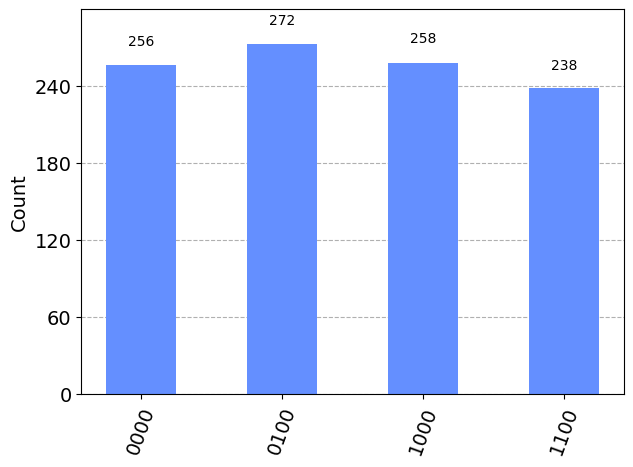

In [16]:
from qiskit import Aer, execute
M_simulator = Aer.get_backend('qasm_simulator')

job = execute(qc,M_simulator,shots = 1024)
counts = job.result().get_counts()
counts

from qiskit.visualization import plot_histogram
plot_histogram(counts)

de aquí obtenemos la lista de valores enteros $2^t s/r$

In [17]:
Ns_list = sorted([int(keys,2) for  keys in counts])[1:] 
print('[2^ts/r] ~ ', Ns_list)

# dividiendo por 2**t
phis_list = [Ns_list[i]/2**t for i in range(len(Ns_list))]
print('phi_s', phis_list)


[2^ts/r] ~  [4, 8, 12]
phi_s [0.25, 0.5, 0.75]


Ahora podemos usar, como antes, dos estrategias para extraer el valor del período $r$:

1. analizando las diferencias: $r = \displaystyle \left(\frac{s+1}{r} - \frac{s}{r}\right)^{-1}$

In [18]:
differences = [int((phis_list[s+1]-phis_list[s])**(-1)) for s in range(len(phis_list)-1)]

print(differences)

print('el valor entero del promedio =', int(sum(differences)/len(differences)))

[4, 4]
el valor entero del promedio = 4


2. usando la representación en fracciones continuas: $\, \displaystyle \varphi_s = \frac{s}{r}$

In [19]:
from fractions import Fraction
print('[s/r]=',[Fraction(phis_list[i]).limit_denominator(20) for i in range(int(len(phis_list)))])

[s/r]= [Fraction(1, 4), Fraction(1, 2), Fraction(3, 4)]


::::::{admonition} Notar
:class: note



- En el caso más general $\varphi_s = 2^t s/r \notin {\mathbb Z}$ no será un entero
    

- Entonces el resultado de la medida $m_s$ seguirá una distribución de probabilidad <i>picada</i> en torno a la parte entera $a_s = [2^t s/r]$
    

- Haciendo un número alto de medidas y seleccionando los eventos  $m_s = a_s$ más probables podemos recuperar $r$ por los mismos métodos anteriores.
::::::
